In [3]:
import pandas as pd
from sklearn import cluster
import numpy as np 
import matplotlib.pyplot as plt



data = pd.read_csv('./Salary_Data.csv')
print(data.head())
print(data.columns)
X = data.values


   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0
Index(['YearsExperience', 'Salary'], dtype='object')


C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


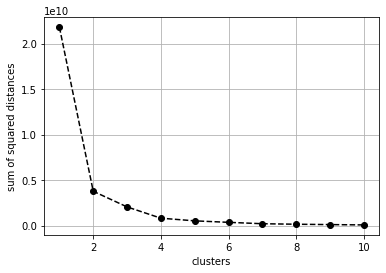

In [4]:
# elbow method
cl = []
dis = []
for i in range(1,11,1):
    cl.append(i)
    kmModel = cluster.KMeans(n_clusters=i,random_state=10)
    kmModel = kmModel.fit(X)
    dis.append(kmModel.inertia_)

plt.figure(1)
plt.plot(cl,dis,'--ko')
plt.xlabel('clusters')
plt.ylabel('sum of squared distances')
plt.grid('on')


[[9.40000000e+00 1.14670286e+05]
 [3.21176471e+00 5.45702353e+04]
 [6.50000000e+00 9.16173333e+04]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 0 0 0 0 0 0 0]


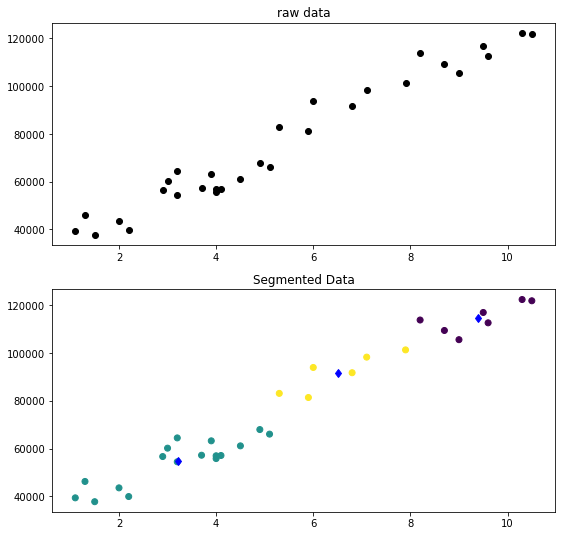

In [17]:
# final number of clusters is 3
# kmeans models for 3 cluster 
kmModel = cluster.KMeans(n_clusters=3,random_state=10)
kmModel = kmModel.fit(X)
print(kmModel.cluster_centers_)
print(kmModel.labels_)
label = kmModel.labels_
centroids = kmModel.cluster_centers_

plt.figure(2,figsize=(9,9))
plt.subplot(2,1,1)
# markers o-cicle,s-square,d-diamond,*-star
plt.plot(X[:,0],X[:,1],'ko')
plt.title('raw data')
plt.subplot(2,1,2)
plt.scatter(X[:,0],X[:,1],c=label)
plt.title('Segmented Data')
for i in range(len(centroids)):
    plt.plot(centroids[i][0],centroids[i][1],'bd')


In [18]:
# add the label in data

data['category'] = label


In [16]:
print(data.head())

   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0


In [17]:
# to update the csv file with labels which are determined using the KMeans algorithm

data.to_csv('./Salary_Data_updated.csv')
